# How Education Levels drive Income Levels
### A Data Storytelling Case Study - Adult Income Dataset
by Cameron Hicks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Hypothesis

Do higher education levels have a strong correlation to higher income levels?

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### The two charte below show the strong similarity in percentages of individuals earning more than 50k and individuals with an education level of a college degree or higher. 

In [4]:
income_pct = (
    df['income']
    .value_counts(normalize=True)
    .reindex(['<=50K', '>50K'])
)

In [14]:
def education_bucket(edu):
    if edu in ['Preschool', '1st-4th', '5th-6th', '7th-8th',
               '9th', '10th', '11th', '12th']:
        return 'No High School Diploma'
    elif edu == 'HS-grad':
        return 'High School Graduate'
    elif edu in ['Some-college']:
        return 'Some College'
    elif edu in ['Assoc-acdm', 'Assoc-voc', 'Bachelors']:
        return 'College Degree (Associates or Bachelor’s)'
    else:
        return 'Advanced / Professional Degree'

df['education_group'] = df['education'].apply(education_bucket)

In [15]:
def college_bucket(edu_group):
    if edu_group in ['No High School Diploma', 'High School Graduate', 'Some College']:
        return 'Below College'
    else:
        return 'College & Above'

df['college_group'] = df['education_group'].apply(college_bucket)

In [16]:
college_pct = (
    df['college_group']
    .value_counts(normalize=True)
    .reindex(['Below College', 'College & Above'])
)

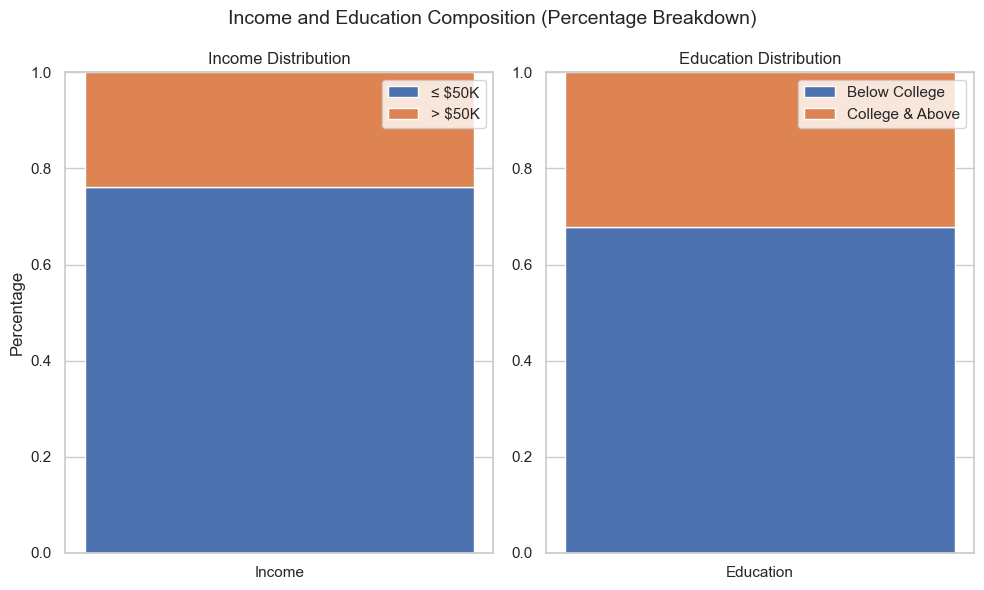

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Income Plot
axes[0].bar(
    'Income',
    income_pct['<=50K'],
    label='≤ $50K'
)

axes[0].bar(
    'Income',
    income_pct['>50K'],
    bottom=income_pct['<=50K'],
    label='> $50K'
)

axes[0].set_title('Income Distribution')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 1)
axes[0].legend()

#Education Plot
axes[1].bar(
    'Education',
    college_pct['Below College'],
    label='Below College'
)

axes[1].bar(
    'Education',
    college_pct['College & Above'],
    bottom=college_pct['Below College'],
    label='College & Above'
)

axes[1].set_title('Education Distribution')
axes[1].set_ylim(0, 1)
axes[1].legend()

fig.suptitle('Income and Education Composition (Percentage Breakdown)', fontsize=14)
plt.tight_layout()
plt.show()

These two distributions strongly suggest that education level plays a significant role in income outcomes.

However we can't simply assume that because these charts are similar that education is the key attribute contributing to the higher income. The charts below explore the percentages of individuals in each education group by the two income brackets

In [18]:
education_order = [
    'No High School Diploma',
    'High School Graduate',
    'Some College',
    'College Degree (Associates or Bachelor’s)',
    'Advanced / Professional Degree'
]

In [19]:
edu_under_50k = (
    df[df['income'] == '<=50K']['education_group']
    .value_counts(normalize=True)
    .reindex(education_order)
    .fillna(0)
)

edu_over_50k = (
    df[df['income'] == '>50K']['education_group']
    .value_counts(normalize=True)
    .reindex(education_order)
    .fillna(0)
)

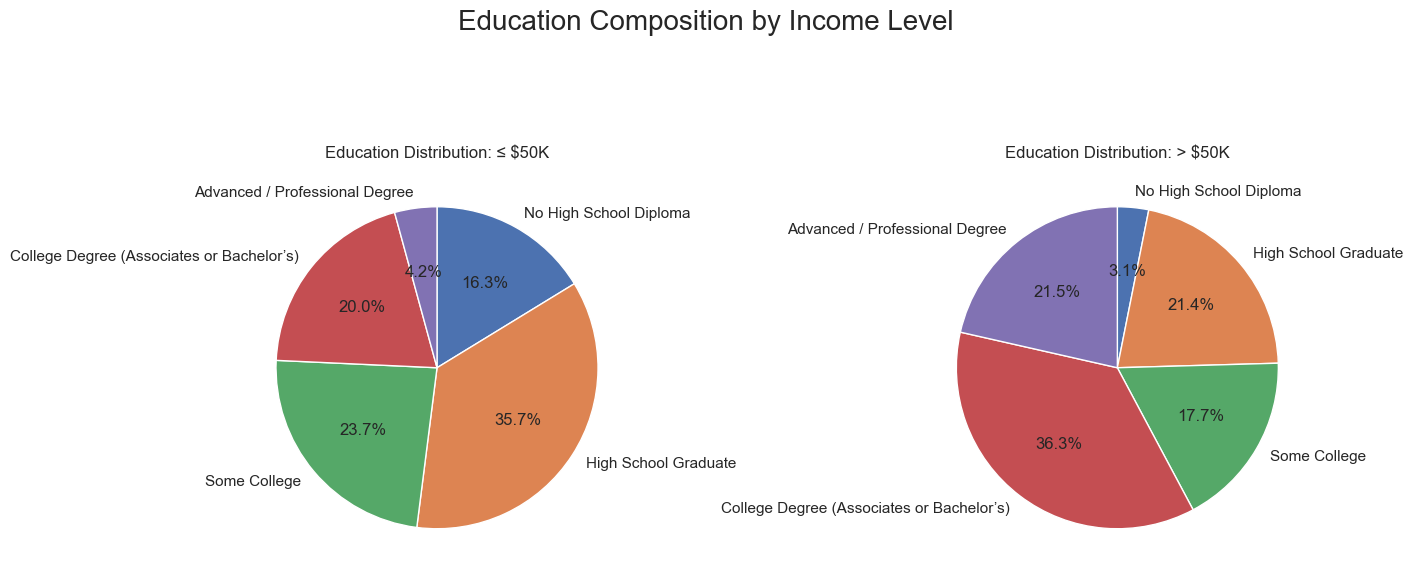

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# Pie Chart for <=50K
axes[0].pie(
    edu_under_50k,
    labels=edu_under_50k.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
axes[0].set_title('Education Distribution: ≤ $50K')

# Pie Chart for >50K
axes[1].pie(
    edu_over_50k,
    labels=edu_over_50k.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
axes[1].set_title('Education Distribution: > $50K')

plt.suptitle('Education Composition by Income Level', fontsize=20)
plt.tight_layout()
plt.show()

These pie charts highlight the strongest differences at the lower and upper ends of educational attainment. Only 4.2% of individuals earning less than 50K hold an advanced or professional degree, compared with 21.5% of individuals earning more than 50K.

Similarly, the share of individuals with a college degree rises from 20% among lower earners to 36.3% among higher earners, while the proportion with some college decreases modestly by 6%.

This raises a natural question: what is the probability of earning more than $50K by education level?

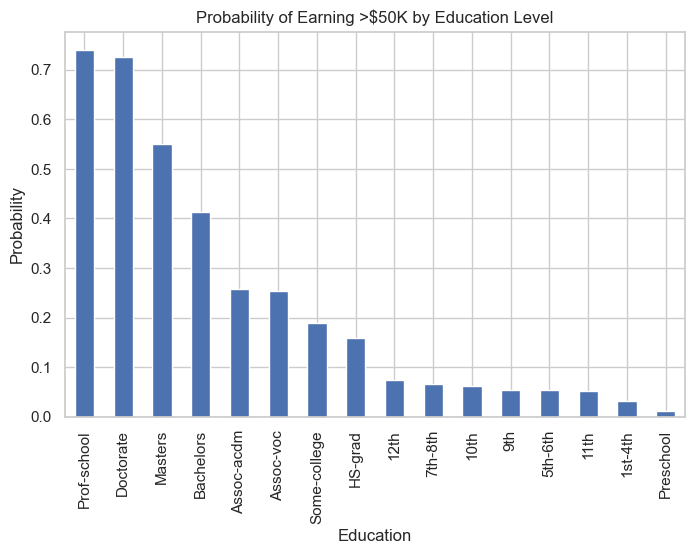

In [21]:
edu_income = (
    df.groupby('education')['income']
    .apply(lambda x: (x == '>50K').mean())
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
edu_income.plot(kind='bar')
plt.title("Probability of Earning >$50K by Education Level")
plt.ylabel("Probability")
plt.xlabel("Education")
plt.show()

Examining the probabilities of earning more than 50k by education level shows a clear trend of the likelyhood of earning a higher income with higher levels of education. We can see that High School Graduates and individuals with only some college have less than a 20% probability of earning more than 50k, where as individuals with Bachelors degress have a 40% chance, and advanced degrees even higher probabilities. 

## Conclusion

By comparing education levels to income levels, we can deduce that education is a key driver of income levels. High education levels, especially advanced degrees, show a much higher probability of earning more than 50k.